In [3]:
import pandas as pd
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
icu = pd.read_csv("ICUData.csv")
icu

,ID,sex,age,surgery,heart rate,temperature,bilirubin,SAPS II,liver failure,LOS,outcome
0,1,female,76,other,98.0,36.5,6.512142,57,0,1,died
1,2,female,60,gastrointestinal,80.0,38.1,14.523197,52,0,2,home
2,3,male,66,cardiothoracic,99.6,37.4,22.972480,57,0,1,secondary care/rehab
3,4,male,74,other,110.0,39.1,19.299346,45,0,2,home
4,5,female,68,other,94.1,38.5,39.076485,49,0,1,home
...,...,...,...,...,...,...,...,...,...,...,...
495,496,male,62,cardiothoracic,118.0,37.3,13.234537,33,0,1,secondary care/rehab
496,497,male,67,cardiothoracic,115.0,38.0,10.740772,56,0,1,died
497,498,female,53,cardiothoracic,131.0,37.9,14.131188,38,0,3,secondary care/rehab
498,499,male,68,other,86.9,36.0,9.596478,66,0,2,home


In [11]:
df = icu.groupby(["liver failure"])
sum = df["age"].mean()
sum

liver failure
0    63.322917
1    56.750000
Name: age, dtype: float64

In [4]:
icu.info() #bbu verilerle bir hastanın outcame i fakkında bilgi edinebiliriz.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             500 non-null    int64  
 1   sex            500 non-null    object 
 2   age            500 non-null    int64  
 3   surgery        500 non-null    object 
 4   heart rate     500 non-null    float64
 5   temperature    500 non-null    float64
 6   bilirubin      500 non-null    float64
 7   SAPS II        500 non-null    int64  
 8   liver failure  500 non-null    int64  
 9   LOS            500 non-null    int64  
 10  outcome        500 non-null    object 
dtypes: float64(3), int64(5), object(3)
memory usage: 43.1+ KB


In [13]:
icu["surgery"].value_counts() # belirtilen alandaki değerlerden kaçar tane olduğunu bize getirir. frekans tablosu=geçme sıklığı

surgery
cardiothoracic      223
other               121
gastrointestinal     79
neuro                46
trauma               31
Name: count, dtype: int64

In [18]:
icu["surgery"].value_counts() / icu["surgery"].size # len de kullanılabilirdi - ampirik frekans yüzdelik gibi

surgery
cardiothoracic      0.446
other               0.242
gastrointestinal    0.158
neuro               0.092
trauma              0.062
Name: count, dtype: float64

<AxesSubplot:xlabel='surgery'>

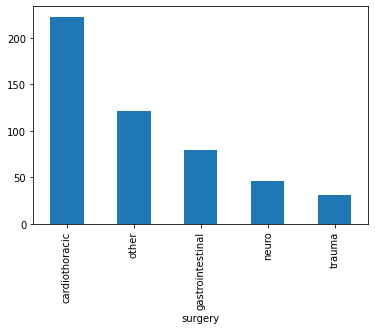

In [22]:
icu["surgery"].value_counts().plot.bar() #value_counts grafiği çizer 

<BarContainer object of 5 artists>

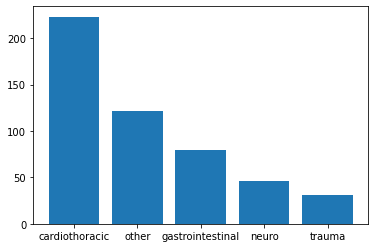

In [25]:
seri = icu["surgery"].value_counts()
plt.bar(seri.index, seri.values)

In [32]:
sns.barplot(x=seri.index y=seri.values)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1567430253.py, line 1)

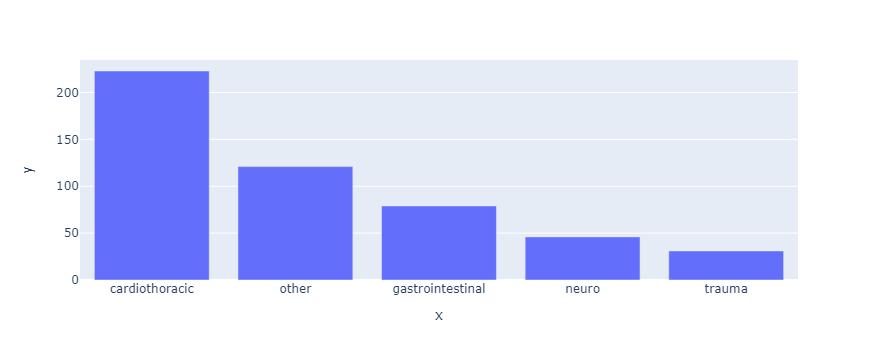

In [31]:
px.bar(x=seri.index, y=seri.values)

<AxesSubplot:ylabel='count'>

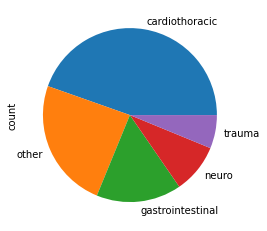

In [33]:
icu["surgery"].value_counts().plot.pie()

In [34]:
plt.pie(x=seri.values, label=seri.index, autopct='%.2f')

TypeError: pie() got an unexpected keyword argument 'label'

In [5]:
px.pie(names=seri.index values=seri.values)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (995559666.py, line 1)

In [ ]:
#quantile bir verinin belli bir bölümünü tanımlar
# çeyrekler önemli, 

In [37]:
icu.describe().T #t transpozu gösterir dedscribe verileri %25 %50 %75 gibi alanlara böler bize yeni değerler döndürür

,count,mean,std,min,25%,50%,75%,max
ID,500.0,250.500000,144.481833,1.000000,125.750000,250.500000,375.250000,500.000000
age,500.0,63.060000,14.766601,18.000000,55.000000,66.000000,73.000000,98.000000
heart rate,500.0,107.414400,20.857983,59.200000,92.725000,104.000000,119.000000,186.000000
temperature,500.0,37.663200,1.735474,9.100000,36.900000,37.700000,38.400000,42.000000
bilirubin,500.0,25.744434,48.422056,3.679049,10.705027,15.312147,23.427203,647.304964
SAPS II,500.0,44.884000,17.224166,12.000000,31.000000,42.000000,57.000000,125.000000
liver failure,500.0,0.040000,0.196155,0.000000,0.000000,0.000000,0.000000,1.000000
LOS,500.0,5.290000,9.857802,1.000000,1.000000,1.000000,5.000000,105.000000


In [39]:
import numpy as np
list1 = list(range(2,22,2))
list2 = [*range(2,22,2)]
list3 = np.arange(2,22,2).tolist()#aynı işi yapar 3ü de 
print(list1)
print(list2)
print(list3)

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20]


In [41]:
np.quantile(list1, 0.2) # listenin 5.6 sı 0.2 den aşağıda

5.6

In [43]:
np.quantile(icu["SAPS II"], 0.5) # hastaların %50 si saps ıı sonucu 42 ye eşit veya 42den küçük

42.0

In [45]:
from scipy.stats import iqr
iqr(icu["SAPS II"]) #%75 ile %25 arasında verilerin % kaçının lduğunu döndürür

26.0

In [ ]:
q75, q25 = np # gerisini araştır


In [47]:
from scipy.stats import median_abs_deviation
median_abs_deviation(icu["SAPS II"])  # haftaya ödev ne demektir araştır

13.0

<AxesSubplot:>

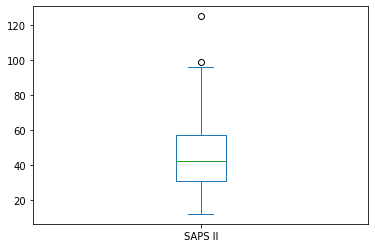

In [48]:
icu["SAPS II"].plot.box()

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd03b678700>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd03b678ca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd03b64f250>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd03b679240>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd03b679510>],
 'means': []}

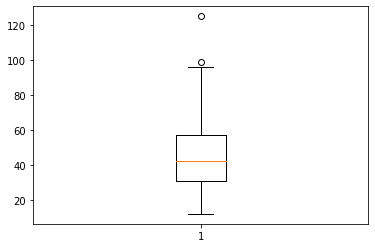

In [49]:
plt.boxplot(icu["SAPS II"])

<AxesSubplot:ylabel='SAPS II'>

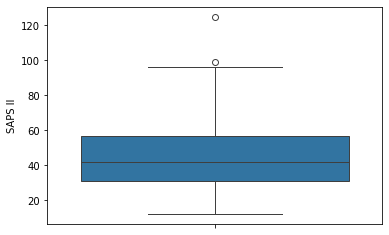

In [50]:
sns.boxplot(icu["SAPS II"])

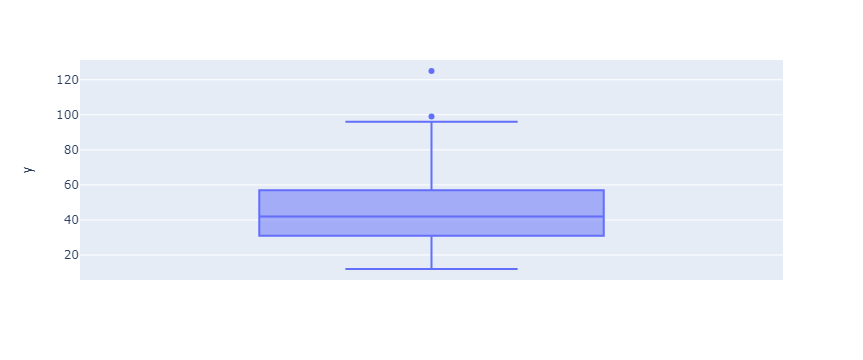

In [52]:
px.box(y=icu["SAPS II"]) # diğerleri ile yanı işi yapar neden görüntü gelmediğini araştır

In [53]:
#örnek1 tekrrar 2, 4, 6, ..., 20 dizisinni ele alalım medyan ve üçüncü çeyreklik %90 ve %95lik ceyrekliklerini hesaplayalım

In [57]:
list = np.arange(2,22,2).tolist()
np.quantile(list,0.95) 

19.099999999999998

In [59]:
list = np.arange(2,22,2).tolist()
np.quantile(list,0.90) 

18.2

In [61]:
list = np.arange(2,22,2).tolist()
np.quantile(list,0.75) 

15.5

In [62]:
list = np.arange(2,202,2).tolist()
np.quantile(list,0.75) 

150.5

In [66]:
list = np.arange(2,202,2).tolist()
q50, q75, q90, q95 = np.quantile(list, [0.50,0.75,0.90, 0.95]) 
print(f"q50 = {q50}, q75={q75}, q90={q90}, q95={q95}")

q50 = 101.0, q75=150.5, q90=180.20000000000002, q95=190.1


In [67]:
liste = np.arange(2,20,2).tolist()
liste.append(200)
q50, q75, q90, q95 = np.quantile(list, [0.50,0.75,0.90, 0.95]) 
print(f"q50 = {q50}, q75={q75}, q90={q90}, q95={q95}")

q50 = 101.0, q75=150.5, q90=180.20000000000002, q95=190.1


In [ ]:
# listeye yüksek değer eklemek sadece %95 i değiştirdi diğerlerini etkilemedi